## 数据预处理（数据清洗）

In [3]:
## 用pandas的api读取数据
import numpy as np 
import pandas as pd
data = pd.read_csv('driving_log.csv',names=['center','left','right','steering','throttle','reverse','speed'])

In [4]:
data['speed']

0        0.649786
1        0.627942
2        0.622910
3        0.619162
4        0.615438
          ...    
4048    26.017680
4049    25.808640
4050    25.652960
4051    25.446850
4052    17.007810
Name: speed, Length: 4053, dtype: float64

## 数据清洗

In [5]:
## 查看方向盘角度数据的分布情况
# counts 出现次数
# angle 数据范围
counts, angle = np.histogram(data['steering'],20) # 把方向盘的转角数据分成20份

In [6]:
counts,angle

(array([  36,   10,    5,   15,   14,   28,   58,  138,  151,  131, 3095,
         139,  105,   42,   25,    5,   12,    2,    7,   35], dtype=int64),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

In [7]:
center = (angle[1:]+angle[:-1])/2 # 计算出来每一块范围中心点的坐标

<BarContainer object of 20 artists>

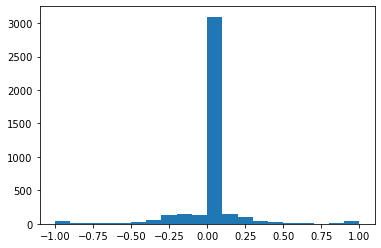

In [8]:
## 数据集的可视化
import matplotlib.pyplot as plt
plt.bar(center,counts,width=0.1)

In [9]:
## 数据清洗： 根据数据的分布规律，把结果一直一些特别多的训练数据给删除掉
## 过滤出来直行的数据
## 记录所有的直行（方向盘的角度为0）数据的位置信息
list = []
for i in range(0,len(data['steering'])):
    if data['steering'][i] == 0:
        list.append(i)

<BarContainer object of 20 artists>

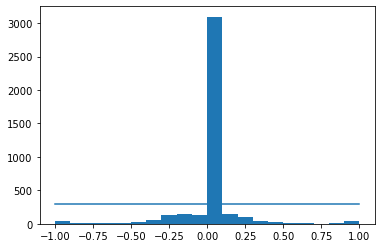

In [10]:
plt.plot((-1,1),(300,300))
plt.bar(center,counts,width=0.1)

## 把方向盘角度为0的数据，洗牌，最后只保留300条记录

In [11]:
np.random.shuffle(list)
removeList = list[250:]
print(len(removeList))


2677


In [12]:
# 操作原始的数据集，丢弃掉2627条数据
data.drop(removeList,inplace=True)

In [13]:
data

,center,left,right,steering,throttle,reverse,speed
6,C:\Users\Administrator\Desktop\new_track\IMG\c...,C:\Users\Administrator\Desktop\new_track\IMG\l...,C:\Users\Administrator\Desktop\new_track\IMG\r...,0.000000,0.000000,0.0,0.606834
9,C:\Users\Administrator\Desktop\new_track\IMG\c...,C:\Users\Administrator\Desktop\new_track\IMG\l...,C:\Users\Administrator\Desktop\new_track\IMG\r...,0.000000,0.024006,0.0,0.620654
12,C:\Users\Administrator\Desktop\new_track\IMG\c...,C:\Users\Administrator\Desktop\new_track\IMG\l...,C:\Users\Administrator\Desktop\new_track\IMG\r...,-0.050000,0.642727,0.0,1.434013
13,C:\Users\Administrator\Desktop\new_track\IMG\c...,C:\Users\Administrator\Desktop\new_track\IMG\l...,C:\Users\Administrator\Desktop\new_track\IMG\r...,-0.250000,0.863326,0.0,2.173052
14,C:\Users\Administrator\Desktop\new_track\IMG\c...,C:\Users\Administrator\Desktop\new_track\IMG\l...,C:\Users\Administrator\Desktop\new_track\IMG\r...,-0.400000,1.000000,0.0,2.864847
...,...,...,...,...,...,...,...
4023,C:\Users\Administrator\Desktop\new_track\IMG\c...,C:\Users\Administrator\Desktop\new_track\IMG\l...,C:\Users\Administrator\Desktop\new_track\IMG\r...,0.150000,1.000000,0.0,30.184000
4024,C:\Users\Administrator\Desktop\new_track\IMG\c...,C:\Users\Administrator\Desktop\new_track\IMG\l...,C:\Users\Administrator\Desktop\new_track\IMG\r...,0.300000,1.000000,0.0,30.169180
4025,C:\Users\Administrator\Desktop\new_track\IMG\c...,C:\Users\Administrator\Desktop\new_track\IMG\l...,C:\Users\Administrator\Desktop\new_track\IMG\r...,0.097232,0.811835,0.0,30.153680
4042,C:\Users\Administrator\Desktop\new_track\IMG\c...,C:\Users\Administrator\Desktop\new_track\IMG\l...,C:\Users\Administrator\Desktop\new_track\IMG\r...,0.000000,0.000000,0.0,27.143300


## 数据清洗后的效果，只保留了1376条数据

<BarContainer object of 20 artists>

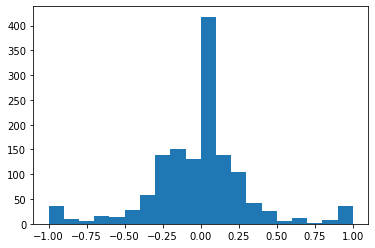

In [14]:
## 查看清洗完毕后，数据的效果
counts, angle = np.histogram(data['steering'],20) # 把方向盘的转角数据分成20份
center = (angle[1:]+angle[:-1])/2 # 计算出来每一块范围中心点的坐标
plt.bar(center,counts,width=0.1)

## 数据集合的拆分，拆分训练集和测试集

In [15]:
info = data[['center','steering']]
info.to_csv('info.csv')

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(info['center'],info['steering'],test_size=0.2,random_state=25)

In [17]:
print("训练集：{}个数据，测试集：{}个数据".format(len(X_train),len(X_test)))

训练集：1100个数据，测试集：276个数据


(array([ 5.,  3.,  0.,  3.,  3.,  8., 16., 35., 30., 21., 89., 25., 10.,
         7.,  6.,  0.,  6.,  1.,  2.,  6.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

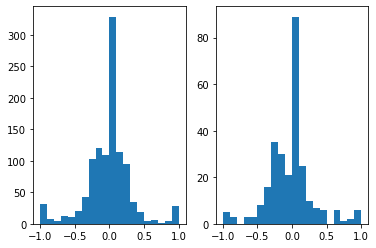

In [18]:
plt.subplot(121)
plt.hist(y_train,20,width=0.1)
plt.subplot(122)
plt.hist(y_test,20,width=0.1)


## 对图片数据进行预处理

## 数据的预处理 rgb->yuv 调整宽高

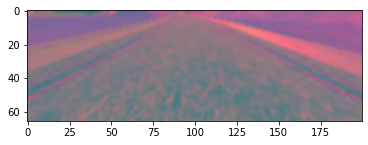

In [20]:
import matplotlib.pyplot as plt
import cv2
img = plt.imread(X_train.iloc[2])
img = img[60:135,:,:]
img = cv2.GaussianBlur(img,(3,3),1)
img = cv2.resize(img,(200,66))
img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
plt.imshow(img)

In [23]:
## 包装方法
## 图片预处理的逻辑，接受参数图片的路径
def img_preprocess(imgpath):
    img = plt.imread(imgpath)
    img = img[60:135,:,:]
    img = cv2.GaussianBlur(img,(3,3),1)
    img = cv2.resize(img,(200,66))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    return img

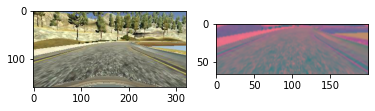

In [26]:
## 绘图对比原图和预处理后的图
randomindex = np.random.randint(len(X_train))
src_img = plt.imread(X_train.iloc[randomindex])
dest_img = img_preprocess(X_train.iloc[randomindex])
plt.subplot(121)
plt.imshow(src_img)
plt.subplot(122)
plt.imshow(dest_img)
plt.show()

In [27]:
## 准备卷积神经网络CNN需要的数据
trainImage = []
for i in range(0,len(X_train)):
    img = img_preprocess(X_train.iloc[i])
    img = img/255.0 # 数据的归一化操作
    trainImage.append(img)
X_train_imgs = np.array(trainImage)

In [28]:
testImage = []
for i in range(0,len(X_test)):
    img = img_preprocess(X_test.iloc[i])
    img = img/255.0 # 数据的归一化操作
    testImage.append(img)
X_test_imgs = np.array(testImage)

In [29]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [32]:
y_test.shape

(276,)

In [ ]:
##保存npz文件
X_train
y_train
X_test
y_test